In [1]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('fivethirtyeight')

In [8]:
log = pd.read_csv("google.csv")

In [9]:
log.shape

(260, 11)

In [10]:
log.dtypes

comments                                    object
Unnamed: 1                                  object
Unnamed: 2                                  object
Unnamed: 3                                  object
Unnamed: 4                                  object
Unnamed: 5                                  object
Unnamed: 6                                  object
Unnamed: 7                                 float64
Unnamed: 8                                 float64
ODSEW-ShBeI-hWJfub-yHKmmc-tv6Bve-hidden     object
ODSEW-ShBeI-hWJfub-yHKmmc-NnAfwf           float64
dtype: object

In [11]:
log.head()

,comments,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,ODSEW-ShBeI-hWJfub-yHKmmc-tv6Bve-hidden,ODSEW-ShBeI-hWJfub-yHKmmc-NnAfwf
0,I enrolled myself for Product Management PG ce...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In order to explain my experience of this cour...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jigsaw is good platform to excel your career a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,This course gives a great understanding of dif...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"It's a nice place to learn Analytics, the loca...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = pd.DataFrame(log['comments'] , columns= ['comments'])
df['comments'] = df['comments'].fillna('').apply(str)

In [13]:
def cleanTxt(text):
 comments = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 comments = re.sub('#', '', text) # Removing '#' hash tag
 comments = re.sub('RT[\s]+', '', text) # Removing RT
 comments = re.sub('https?:\/\/\S+', '', text)# Removing hyperlink
 

 
 return comments


# Clean the tweets
df['comments'] = df['comments'].apply(cleanTxt)

# Show the cleaned tweets
df

,comments
0,I enrolled myself for Product Management PG ce...
1,In order to explain my experience of this cour...
2,Jigsaw is good platform to excel your career a...
3,This course gives a great understanding of dif...
4,"It's a nice place to learn Analytics, the loca..."
...,...
255,I enrolled for the Full Stack Data Science(FSD...
256,Excellect
257,Indeed a great learning experience. The course...
258,"Being a MBA, I was into management job and was..."


In [14]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
sentences = word_tokenize("I love to learn NLP \n 'a :(")
#for i in range(len(sentences)):
sentences = [word.lower() for word in sentences if re.match('^[a-zA-Z]+', word)]  
sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i', 'love', 'to', 'learn', 'nlp', 'a']

In [15]:
#Removing emojis from the comments
import emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['comments'] = df['comments'].apply(remove_emoji)
df

,comments
0,I enrolled myself for Product Management PG ce...
1,In order to explain my experience of this cour...
2,Jigsaw is good platform to excel your career a...
3,This course gives a great understanding of dif...
4,"It's a nice place to learn Analytics, the loca..."
...,...
255,I enrolled for the Full Stack Data Science(FSD...
256,Excellect
257,Indeed a great learning experience. The course...
258,"Being a MBA, I was into management job and was..."


In [16]:
def cleanTxt(text):
 comments = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 comments = re.sub('#', '', text) # Removing '#' hash tag
 comments = re.sub('RT[\s]+', '', text) # Removing RT
 comments = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text
df['comments'] = df['comments'].apply(cleanTxt)

# Show the cleaned tweets
df

,comments
0,I enrolled myself for Product Management PG ce...
1,In order to explain my experience of this cour...
2,Jigsaw is good platform to excel your career a...
3,This course gives a great understanding of dif...
4,"It's a nice place to learn Analytics, the loca..."
...,...
255,I enrolled for the Full Stack Data Science(FSD...
256,Excellect
257,Indeed a great learning experience. The course...
258,"Being a MBA, I was into management job and was..."


In [17]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['comments'].apply(getSubjectivity)
df['Polarity'] = df['comments'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,comments,Subjectivity,Polarity
0,I enrolled myself for Product Management PG ce...,0.650000,0.466667
1,In order to explain my experience of this cour...,0.500000,0.062500
2,Jigsaw is good platform to excel your career a...,0.425000,0.475000
3,This course gives a great understanding of dif...,0.576786,0.375000
4,"It's a nice place to learn Analytics, the loca...",0.800000,0.395000
...,...,...,...
255,I enrolled for the Full Stack Data Science(FSD...,0.362500,0.312500
256,Excellect,0.000000,0.000000
257,Indeed a great learning experience. The course...,0.505833,0.348333
258,"Being a MBA, I was into management job and was...",1.000000,-0.175000


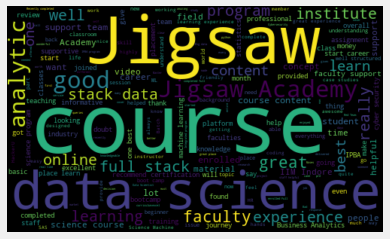

In [18]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['comments']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,comments,Subjectivity,Polarity,Analysis
0,I enrolled myself for Product Management PG ce...,0.650000,0.466667,Positive
1,In order to explain my experience of this cour...,0.500000,0.062500,Positive
2,Jigsaw is good platform to excel your career a...,0.425000,0.475000,Positive
3,This course gives a great understanding of dif...,0.576786,0.375000,Positive
4,"It's a nice place to learn Analytics, the loca...",0.800000,0.395000,Positive
...,...,...,...,...
255,I enrolled for the Full Stack Data Science(FSD...,0.362500,0.312500,Positive
256,Excellect,0.000000,0.000000,Neutral
257,Indeed a great learning experience. The course...,0.505833,0.348333,Positive
258,"Being a MBA, I was into management job and was...",1.000000,-0.175000,Negative


In [20]:
print('Printing positive Content:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['comments'][i])
    print()
    j= j+1

Printing positive Content:

1) I enrolled myself for Product Management PG certification and I must say that my learning has been nothing short of great. The curriculum has been one of a kind which enables working professionals to scale up and develop the skills required …

2) In order to explain my experience of this course i've breakdown my review into 5 major categories.
1) Quality and quantity …

3) Jigsaw is good platform to excel your career and to learn all the trending courses. Till date my experience is good and looking forward to take more insights from Industry experts provided by Jigsaw. Academic content is up to date as per …

4) This course gives a great understanding of different fields in Business analytics and their applications. Faculty were good and the Jigsaw portal videos make things really simple. Some amount of dedicated time is required to pull this off …

5) It's a nice place to learn Analytics, the location can't be better than this, the staff and the teaching

In [21]:
# Printing negative comment  
print('Printing negative Content:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['comments'][i])
    print()
    j=j+1

Printing negative Content:

1) Bad experience with online training. After some research and review, I joined data analyst course. Before joining course, consultant from jigsaw provided good information. But after joining the program, felt like I wasted money. …

2) These people are totally fake and all the comments here are wrong these people promises to give placements but after cource completion these people never going to contact you and at the time of certificate these acadamy wants you to give positive feedback thats why these review are always positive dont do cources from jigsaw academy.

3) My recent experience with Jigsaw has me completely disappointed. I wanted to enroll for the full stack Java developer course. While enrolling the sales guy/student advisor-Dipanjan- was constantly following up with me about making the …

4) Course content of good..but as far as placement is concerned ,they do nothing. I completed two courses from Jigsaw ,data science for beginners and data s

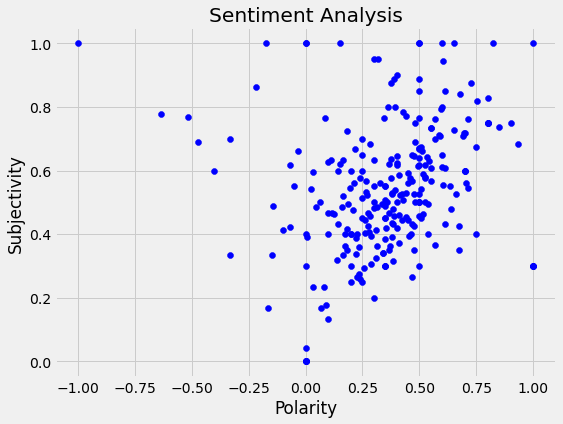

In [23]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [24]:
# Print the percentage of positive comments
pcomments = df[df.Analysis == 'Positive']
pcomments = pcomments['comments']
pcomments

round( (pcomments.shape[0] / df.shape[0]) * 100 , 1)

89.6

In [25]:
# Print the percentage of negative comments
pcomments = df[df.Analysis == 'Negative']
pcomments = pcomments['comments']
pcomments

round( (pcomments.shape[0] / df.shape[0]) * 100 , 1)

6.5

In [26]:
# Show the value counts
df['Analysis'].value_counts()

Positive    233
Negative     17
Neutral      10
Name: Analysis, dtype: int64

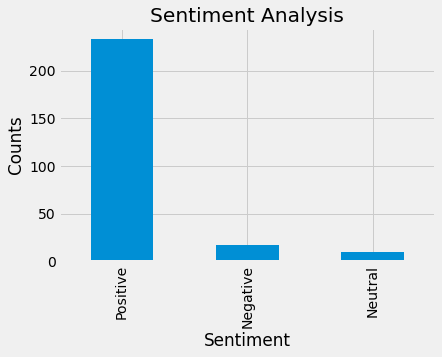

In [27]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()